# D212 - Data Mining 2 Performance Assessment Task 3
Aidan Soares, 012042436, Western Governors University

### A1: Research Question
For this performance assessment, I will be utilizing Market Basket Analysis to analyse a dataset of historical customer purchases and identify which products are most popular in conjunction with each other. This will be done to target the items most relevant for establishing bundle campaigns and to proactively supply customers with suggestions on what items may suit their needs based on the items they currently have within their basket.

### A2: Goal
My goal for this performance assessment is to identify the products that are most often purchased together by customers, so that they can be bundled together to further bolster sales, and provide a beneficial time-saving shopping experience for the customer.

### B1: Market Based Analysis
Market Basket Analysis is a data mining method used to determine the strength of the relationship between items within the same 'basket'. These relationships dictate the likelihood of two items being commonly purchased together by customers (such as a toothbrush and toothpaste being in the same basket), so that patterns such as consumer behavior, general purchase trends, and purchase profiles can be uncovered. 

Market Based Analysis is performed on historical customer purchase data, typically using an Apriori algorithm to establish association rules between products, and yield Support, Confidence, and Lift parameters that demonstrably indicate products that are commonly purchased together by consumers. The expected outcome will be relevant parameters that dictate the next likely item that will be purchased given an existing item within the customer's basket, and items that *should* be promoted to customers in tandem to boost revenue streams and consumer appeal.

### B2: Example of Transaction
Within the dataset provided by WGU, the second entry in the historical basket data notes that the customer purchased 3 items: an Apple Lightning to Digital AV Adapter, a TP-Link AC1750 Smart WiFi Router, and an Apple Pencil.

### B3: Assumption of MBA
The major assumption of MBA is that the occurrence of joint items existing within a purchased basket demonstrate a positive correlation between said items to consumers. Meaning that in other market baskets, the purchase of one item will lead to the joint purchase of another item (Hua, 2015). In practice, this is often seen with customers who purchase items that operate in tandem, such as toothpaste and a toothbrush.

### C1: Data Transformation


In [ ]:
#run if mlxtend needs to be installed.
pip install mlxtend

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

#importing dataset into a dataframe
df = pd.read_csv('teleco_market_basket.csv')

In [2]:
df.head()

,Item01,Item02,Item03,Item04,Item05,Item06,Item07,Item08,Item09,Item10,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Item20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Logitech M510 Wireless mouse,HP 63 Ink,HP 65 ink,nonda USB C to USB Adapter,10ft iPHone Charger Cable,HP 902XL ink,Creative Pebble 2.0 Speakers,Cleaning Gel Universal Dust Cleaner,Micro Center 32GB Memory card,YUNSONG 3pack 6ft Nylon Lightning Cable,TopMate C5 Laptop Cooler pad,Apple USB-C Charger cable,HyperX Cloud Stinger Headset,TONOR USB Gaming Microphone,Dust-Off Compressed Gas 2 pack,3A USB Type C Cable 3 pack 6FT,HOVAMP iPhone charger,SanDisk Ultra 128GB card,FEEL2NICE 5 pack 10ft Lighning cable,FEIYOLD Blue light Blocking Glasses
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apple Lightning to Digital AV Adapter,TP-Link AC1750 Smart WiFi Router,Apple Pencil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(15002, 20)

In [4]:
#removing all Null rows from the dataset
df.dropna(how='all', inplace = True)
df.head()

,Item01,Item02,Item03,Item04,Item05,Item06,Item07,Item08,Item09,Item10,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Item20
1,Logitech M510 Wireless mouse,HP 63 Ink,HP 65 ink,nonda USB C to USB Adapter,10ft iPHone Charger Cable,HP 902XL ink,Creative Pebble 2.0 Speakers,Cleaning Gel Universal Dust Cleaner,Micro Center 32GB Memory card,YUNSONG 3pack 6ft Nylon Lightning Cable,TopMate C5 Laptop Cooler pad,Apple USB-C Charger cable,HyperX Cloud Stinger Headset,TONOR USB Gaming Microphone,Dust-Off Compressed Gas 2 pack,3A USB Type C Cable 3 pack 6FT,HOVAMP iPhone charger,SanDisk Ultra 128GB card,FEEL2NICE 5 pack 10ft Lighning cable,FEIYOLD Blue light Blocking Glasses
3,Apple Lightning to Digital AV Adapter,TP-Link AC1750 Smart WiFi Router,Apple Pencil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,UNEN Mfi Certified 5-pack Lightning Cable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Cat8 Ethernet Cable,HP 65 ink,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Dust-Off Compressed Gas 2 pack,Screen Mom Screen Cleaner kit,Moread HDMI to VGA Adapter,HP 62XL Tri-Color ink,Apple USB-C Charger cable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(7501, 20)

In [6]:
#converting dataframe to list of lists (Kamara, 2024)
rows = []
for i in range (0, 7501):
    rows.append([str(df.values[i,j])
    for j in range (0,20)])
rows

[['Logitech M510 Wireless mouse',
  'HP 63 Ink',
  'HP 65 ink',
  'nonda USB C to USB Adapter',
  '10ft iPHone Charger Cable',
  'HP 902XL ink',
  'Creative Pebble 2.0 Speakers',
  'Cleaning Gel Universal Dust Cleaner',
  'Micro Center 32GB Memory card',
  'YUNSONG 3pack 6ft Nylon Lightning Cable',
  'TopMate C5 Laptop Cooler pad',
  'Apple USB-C Charger cable',
  'HyperX Cloud Stinger Headset',
  'TONOR USB Gaming Microphone',
  'Dust-Off Compressed Gas 2 pack',
  '3A USB Type C Cable 3 pack 6FT',
  'HOVAMP iPhone charger',
  'SanDisk Ultra 128GB card',
  'FEEL2NICE 5 pack 10ft Lighning cable',
  'FEIYOLD Blue light Blocking Glasses'],
 ['Apple Lightning to Digital AV Adapter',
  'TP-Link AC1750 Smart WiFi Router',
  'Apple Pencil',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['UNEN Mfi Certified 5-pack Lightning Cable',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
 

In [7]:
#generating true/false array with stored list of lists
DE = TransactionEncoder()
array = DE.fit(rows).transform(rows)

#converting the array into a dataframe
transaction_df = pd.DataFrame(array, columns=DE.columns_)

transaction_df

,10ft iPHone Charger Cable,10ft iPHone Charger Cable 2 Pack,3 pack Nylon Braided Lightning Cable,3A USB Type C Cable 3 pack 6FT,5pack Nylon Braided USB C cables,ARRIS SURFboard SB8200 Cable Modem,Anker 2-in-1 USB Card Reader,Anker 4-port USB hub,Anker USB C to HDMI Adapter,Apple Lightning to Digital AV Adapter,...,iFixit Pro Tech Toolkit,iPhone 11 case,iPhone 12 Charger cable,iPhone 12 Pro case,iPhone 12 case,iPhone Charger Cable Anker 6ft,iPhone SE case,nan,nonda USB C to USB Adapter,seenda Wireless mouse
0,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
7497,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [8]:
#removing the NAN column from the dataset
transaction_df.drop(columns='nan', inplace=True)
transaction_df.head()

,10ft iPHone Charger Cable,10ft iPHone Charger Cable 2 Pack,3 pack Nylon Braided Lightning Cable,3A USB Type C Cable 3 pack 6FT,5pack Nylon Braided USB C cables,ARRIS SURFboard SB8200 Cable Modem,Anker 2-in-1 USB Card Reader,Anker 4-port USB hub,Anker USB C to HDMI Adapter,Apple Lightning to Digital AV Adapter,...,hP 65 Tri-color ink,iFixit Pro Tech Toolkit,iPhone 11 case,iPhone 12 Charger cable,iPhone 12 Pro case,iPhone 12 case,iPhone Charger Cable Anker 6ft,iPhone SE case,nonda USB C to USB Adapter,seenda Wireless mouse
0,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
#exporting transformed dataframe to csv file
transaction_df.to_csv('cleaned_teleco_market_basket.csv', index=False)

### C2: Apriori Code Execution


Text(0, 0.5, 'Product')

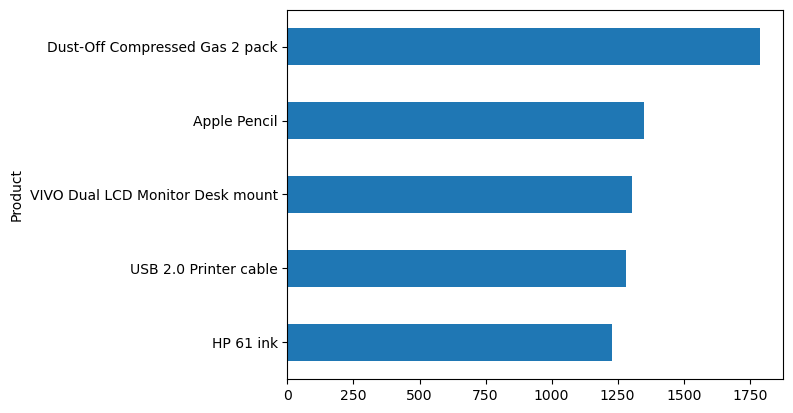

In [10]:
#identifying the 5 most popular items purchased from the historical data
count = transaction_df.loc[:,:].sum()
popular_prod = count.sort_values(0, ascending = False).head(5)

popular_prod.sort_values(ascending = True).plot.barh()
plt.ylabel("Product")

In [11]:
#generating rules with minimum support value of 0.02
rules = apriori(transaction_df, min_support=0.02, use_colnames = True)
rules

,support,itemsets
0,0.050527,(10ft iPHone Charger Cable 2 Pack)
1,0.042528,(3A USB Type C Cable 3 pack 6FT)
2,0.029463,(Anker 2-in-1 USB Card Reader)
3,0.068391,(Anker USB C to HDMI Adapter)
4,0.087188,(Apple Lightning to Digital AV Adapter)
...,...,...
98,0.023730,"(USB 2.0 Printer cable, Screen Mom Screen Clea..."
99,0.035462,"(VIVO Dual LCD Monitor Desk mount, Screen Mom ..."
100,0.020131,"(USB 2.0 Printer cable, Stylus Pen for iPad)"
101,0.025197,"(Stylus Pen for iPad, VIVO Dual LCD Monitor De..."


### C3: Association Rules

In [12]:
#generating associating rule table containing antecedents, consequents, support, confidence, and lift values
ruletable = association_rules(rules, metric = 'lift', min_threshold = 1)
ruletable.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Dust-Off Compressed Gas 2 pack),(10ft iPHone Charger Cable 2 Pack),0.238368,0.050527,0.023064,0.096756,1.914955,0.011020,1.051182,0.627330
1,(10ft iPHone Charger Cable 2 Pack),(Dust-Off Compressed Gas 2 pack),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,0.503221
2,(Dust-Off Compressed Gas 2 pack),(Anker USB C to HDMI Adapter),0.238368,0.068391,0.024397,0.102349,1.496530,0.008095,1.037830,0.435627
3,(Anker USB C to HDMI Adapter),(Dust-Off Compressed Gas 2 pack),0.068391,0.238368,0.024397,0.356725,1.496530,0.008095,1.183991,0.356144
4,(Anker USB C to HDMI Adapter),(VIVO Dual LCD Monitor Desk mount),0.068391,0.174110,0.020931,0.306043,1.757755,0.009023,1.190117,0.462740
5,(VIVO Dual LCD Monitor Desk mount),(Anker USB C to HDMI Adapter),0.174110,0.068391,0.020931,0.120214,1.757755,0.009023,1.058905,0.521973
6,(Apple Pencil),(Apple Lightning to Digital AV Adapter),0.179709,0.087188,0.028796,0.160237,1.837830,0.013128,1.086988,0.555754
7,(Apple Lightning to Digital AV Adapter),(Apple Pencil),0.087188,0.179709,0.028796,0.330275,1.837830,0.013128,1.224818,0.499424
8,(Dust-Off Compressed Gas 2 pack),(Apple Lightning to Digital AV Adapter),0.238368,0.087188,0.024397,0.102349,1.173883,0.003614,1.016889,0.194486
9,(Apple Lightning to Digital AV Adapter),(Dust-Off Compressed Gas 2 pack),0.087188,0.238368,0.024397,0.279817,1.173883,0.003614,1.057552,0.162275


### C4: Top 3 Rules

In [13]:
#generating rule table for top 3 product bundles ordered by Confidence with Lift values above 1.7
ruletable[(ruletable['lift']>1.7)].sort_values('confidence', ascending=False).head(3) 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(10ft iPHone Charger Cable 2 Pack),(Dust-Off Compressed Gas 2 pack),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,0.503221
37,(FEIYOLD Blue light Blocking Glasses),(Dust-Off Compressed Gas 2 pack),0.065858,0.238368,0.027596,0.419028,1.757904,0.011898,1.310962,0.461536
53,(SanDisk Ultra 64GB card),(Dust-Off Compressed Gas 2 pack),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401,0.474369


The Top 3 relevant rules that I have generated from the Apirori algorithm using the data available has the stipulation that the item pair Lift value must be above 1.7, and it is sorted by Confidence value in descending order. Through this, I have determined the above table to house the Top 3 association rules relevant for my analysis. 

To summarize:
1. The first rule is a pairing between the 10ft iPhone Charger Cable 2 Pack and the Dust-Off Compressed Gas 2 pack. Support, confidence and lift values are 2.3%, 45.6%, and 1.9 respectively.
2. The second rule is a pairing between the FEIYOLD Blue light Blocking Glasses and the Dust-Off Compressed Gas 2 pack. Support, confidence and lift values are 2.75%, 41.9%, and 1.75 respectively.
3. The third rule is a pairing between the SanDisk Ultra 64GB card and the Dust-Off Compressed Gas 2 pack. Support, confidence and lift values are 4%, 41.6%, and 1.74 respectively.

### D1: Summary
**Support**: The measured frequency that an item purchase or paired item purchase occurs within any given transaction, calculated as the ratio between the total purchases of said item and the total number of transactions. From the top 3 rules determined in C4, we can see that 10ft iPhone Charger Cable 2 Pack and the Dust-Off Compressed Gas 2 pack have a paired frequency of 2.3% of all transactions within the dataset.

**Confidence**: A measurement that indicates the likelihood of item B (the consequent) being purchased if item A (the antecedent) is purchased. As such, this parameter operates as an if-then statement, but this measurement on its own presents flaws in how it accounts for item popularity; it only measures the popularity of item A in its resulting purchase of item B, the popularity of item B on its own is not taken into account.

**Lift**: The lift value is a ratio that takes into account the limitation of Confidence, weighing the calculated confidence against the expected confidence (popularity) of item B independantly. Thus, the Lift value is an additional measure that denotes the strength of any rule, so that the correlation of the items can be reviewed independantly of external item popularity. A value of 1 or higher indicates that item B is likely to be purchased is the customer purchases item A, and this association is unlikely if the lift value is less than 1 (Anjana S, 2022). 

Within my Top 3 association rules table, I stipulated that the Lift value had to be above 1.7 even though the table was sorted by descending Confidence, and this is to curb any misrepresentations that Confidence may result in for the 'most popular' item pairings. As an example, if multiple customers decide to buy toothpaste and milk, the resulting Confidence value would be high. However, let's say that toothpaste and milk are independantly popular and customers are likely to buy them both due to general appeal rather than combined value; in this case there is high Confidence level but the two items are realistically not related in any way. This situation throws off the value yielded through the Confidence measure, as no practical or useful insight is obtained between these two items. Therefore, I only wanted to generate the top 3 association rules based on confidence, but only pairings that had high enough lift values to support a relevant and demonstrable correlation for effective business application.

My analysis resulted in item pairings that demonstrate effective and relevant association rules for the company to assess. It is positive that more than 40% of the time, if a customer buys a 10ft iPHone Charger Cable 2 Pack, FEIYOLD Blue light Blocking Glasses, or a SanDisk Ultra 64GB card, they will subsequently purchase Dust-Off Compressed Gas 2 pack as well. This is further supported by the lift values being above 1.7, noting strong likelihood of association and purchase between the two items in each rule.

### D2: Practical Significance
The practical significance of Market Basket Analysis would be highly significant to any company that can take advantage of paired bundles and item placement. The analysis performed through the Apriori algorithm demonstrates strong success in determining relevant item association rules, and can be acted upon very easily via store layout or website structure. Once the significant consequent items are known, companies can often set up stands of these items near the cash registers or as a bottom bar in the checkout window of an online platform, to encourage customers to grab additional items that they may have missed. Furthermore, the results of this analysis could also be customer facing rather than just internal: The popular purchasing website Amazon provides helpful references at the bottom of the screen based on items within your current market basket, providing suggestions in the form of items that are "frequently purchased together".

### D3: Recommendation
Based on the analysis conducted above, internal stakeholders should be made aware that customers demonstrate a strong desire to purchase Dust-Off Compressed Gas 2 packs alongside multiple antecedent items. As such, it would be prudent to structure a buy one get 50% off deal for these compressed gas packs after purchasing known antecedents, or even setting up a rack of these compressed gas packs near the checkout aisles, so that customers who may have forgotten to pick one up before checking out can do so.

### E1: Panopto Video
The panopto video for this performance assessment can be found here: https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=92fcc83d-ea77-4b23-9e48-b18000ee6e11

### F: Code Sources
Kamara, Kesselly. May 1, 2024. *Market Basket Analysis in Python*. Western Governors University. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=db85c4f1-0da5-4bde-a1a4-b07c0019d46d

### G: Sources
Hua, Sarahtian. September 1, 2015. *Market Basket Analysis*. Wordpress. https://sarahtianhua.wordpress.com/portfolio/market-basket-analysis/

S, Anjana. January 1, 2022. *Association Rule Mining Including Apriori Algorithm.* Medium. https://medium.com/analytics-vidhya/association-rule-mining-including-apriori-algorithm-8c0f9888e125